<a href="https://colab.research.google.com/github/Blackgale/-An-lise-de-Dados-da-Loteria/blob/main/Loterias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from statsmodels.multivariate.manova import MANOVA




In [ ]:
df = pd.read_excel('planilha da mega sena.xlsx', parse_dates=['Data'], index_col='Data')
print(df.columns)



Index(['Concurso', 'bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6'], dtype='object')


<ipython-input-13-03760a964b9c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_excel('planilha da mega sena.xlsx', parse_dates=['Data'], index_col='Data')


In [ ]:
# Concatenar os valores das colunas 'bola 1' até 'bola 6' em uma única Series
numeros = pd.concat([df['bola 1'], df['bola 2'], df['bola 3'], df['bola 4'], df['bola 5'], df['bola 6']])

# Calcular a frequência de cada número
frequencia = numeros.value_counts()

In [ ]:
# Análise da frequência de cada número
frequencia = numeros.value_counts()
# Ordenar a frequência em ordem decrescente
frequencia_ordenada = frequencia.sort_values(ascending=False)
# Exibir os números mais frequentes
print(frequencia_ordenada)

10    311
53    306
5     296
37    288
23    287
34    286
33    285
32    284
41    283
30    283
35    283
44    282
38    282
42    282
4     281
17    280
28    279
56    278
27    277
43    276
11    276
54    275
49    275
29    275
36    275
16    274
13    273
51    272
8     269
2     268
6     267
24    267
46    266
52    266
58    261
50    259
59    259
14    258
45    258
25    258
20    258
18    258
39    256
12    256
60    255
1     254
57    252
9     251
47    250
19    250
40    249
7     249
31    249
3     247
48    246
22    241
15    230
55    226
26    224
21    223
dtype: int64


In [ ]:
# Aqui é um dicionário para armazenar as frequências de cada bola
frequencias = {}

# Calculo da frequência para cada bola e armazenar no dicionário
for i in range(1, 7):
    bola = f'bola {i}'
    frequencias[bola] = df[bola].value_counts()

# Printar as frequências separadas por bola
for bola, freq in frequencias.items():
    print(f'Frequência da {bola}:')
    print(freq)
    print()  # Adiciona uma linha em branco entre as frequências de cada bola

Frequência da bola 1:
28    60
32    57
49    56
4     56
35    54
44    54
47    53
30    53
53    52
25    51
46    51
59    51
19    50
10    50
20    50
2     49
13    49
5     48
43    48
7     48
27    48
17    48
54    47
6     47
38    47
11    47
51    46
24    46
60    46
56    45
37    45
33    45
31    44
45    44
42    43
29    42
9     42
34    42
36    42
22    42
50    41
39    41
41    40
55    40
12    40
14    40
52    38
16    38
1     38
57    38
8     36
21    36
23    35
58    34
26    34
3     33
18    33
48    31
40    30
15    30
Name: bola 1, dtype: int64

Frequência da bola 2:
5     62
32    60
10    60
53    58
8     57
17    55
21    53
42    53
49    53
39    53
56    52
11    52
41    51
3     50
6     49
43    49
33    48
26    47
22    46
23    46
40    46
45    46
58    46
48    45
1     45
37    45
50    45
16    44
36    44
44    44
54    44
51    43
15    43
12    43
18    43
27    42
29    42
59    42
47    41
13    41
52    40
46    40
9     40
3

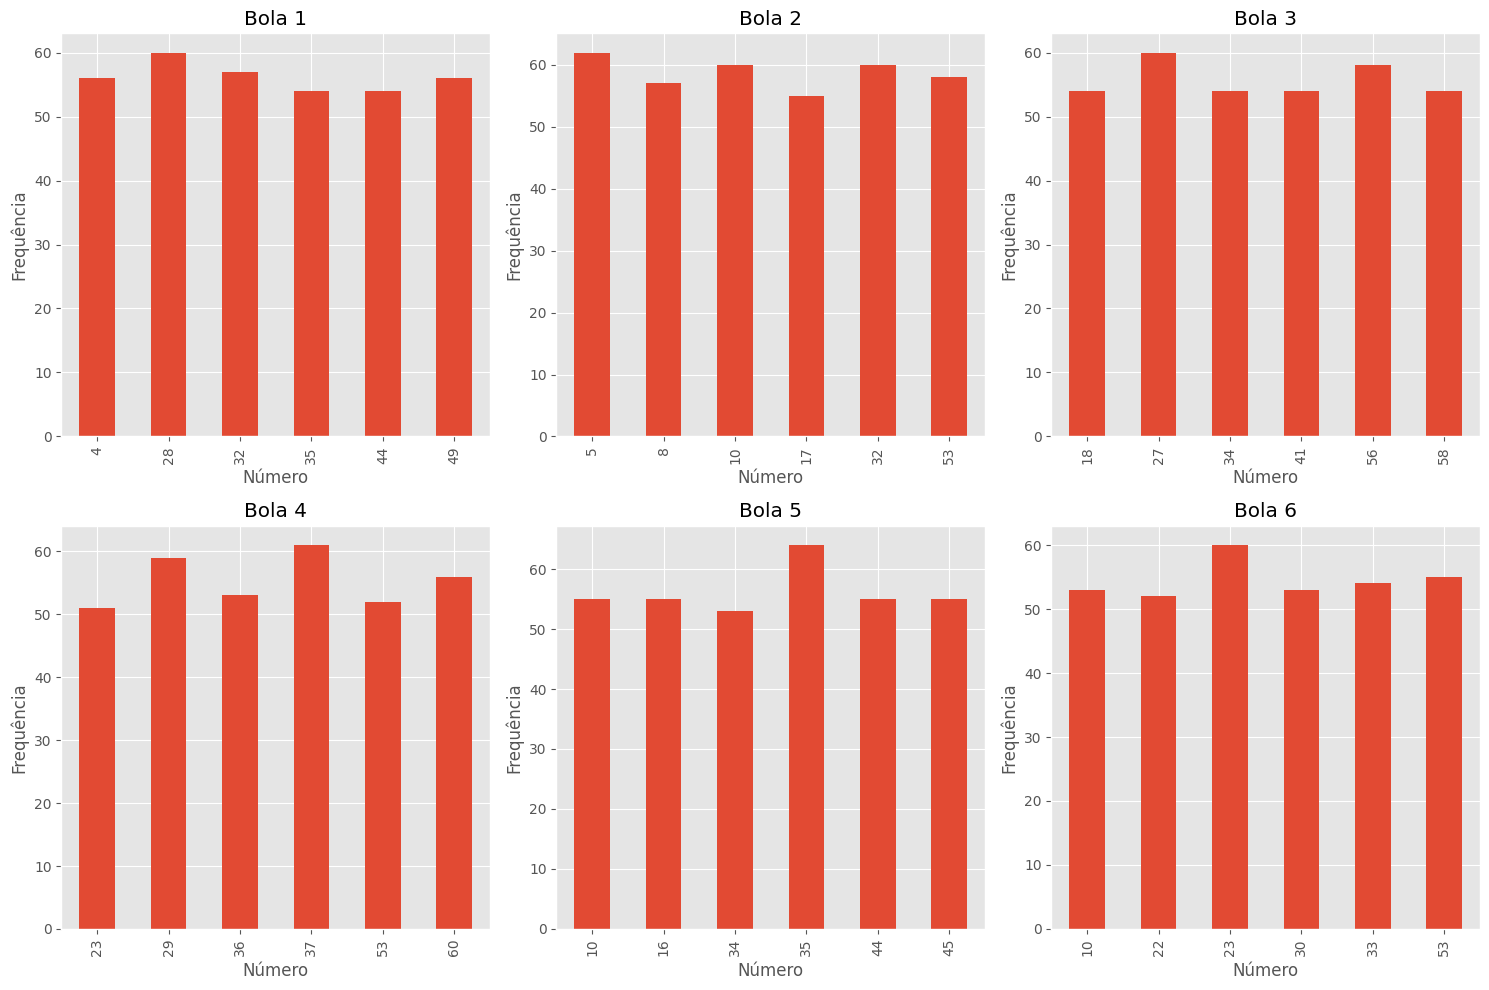

In [ ]:
# Definir o estilo do gráfico
plt.style.use('ggplot')

# Criar uma figura e um conjunto de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# nOME para os gráficos
titulos = ['Bola 1', 'Bola 2', 'Bola 3', 'Bola 4', 'Bola 5', 'Bola 6']

# Calculo da frequência e plotar o gráfico para cada bola
for i in range(1, 7):
    bola = f'bola {i}'
    frequencia = df[bola].value_counts().head(6)  # Pegar os 6 números mais frequentes
    ax = axes[(i-1)//3, (i-1)%3]  # Determinar a posição do subplot
    frequencia.sort_index().plot(kind='bar', ax=ax)
    ax.set_title(titulos[i-1])
    ax.set_xlabel('Número')
    ax.set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Printar o gráfico
plt.show()

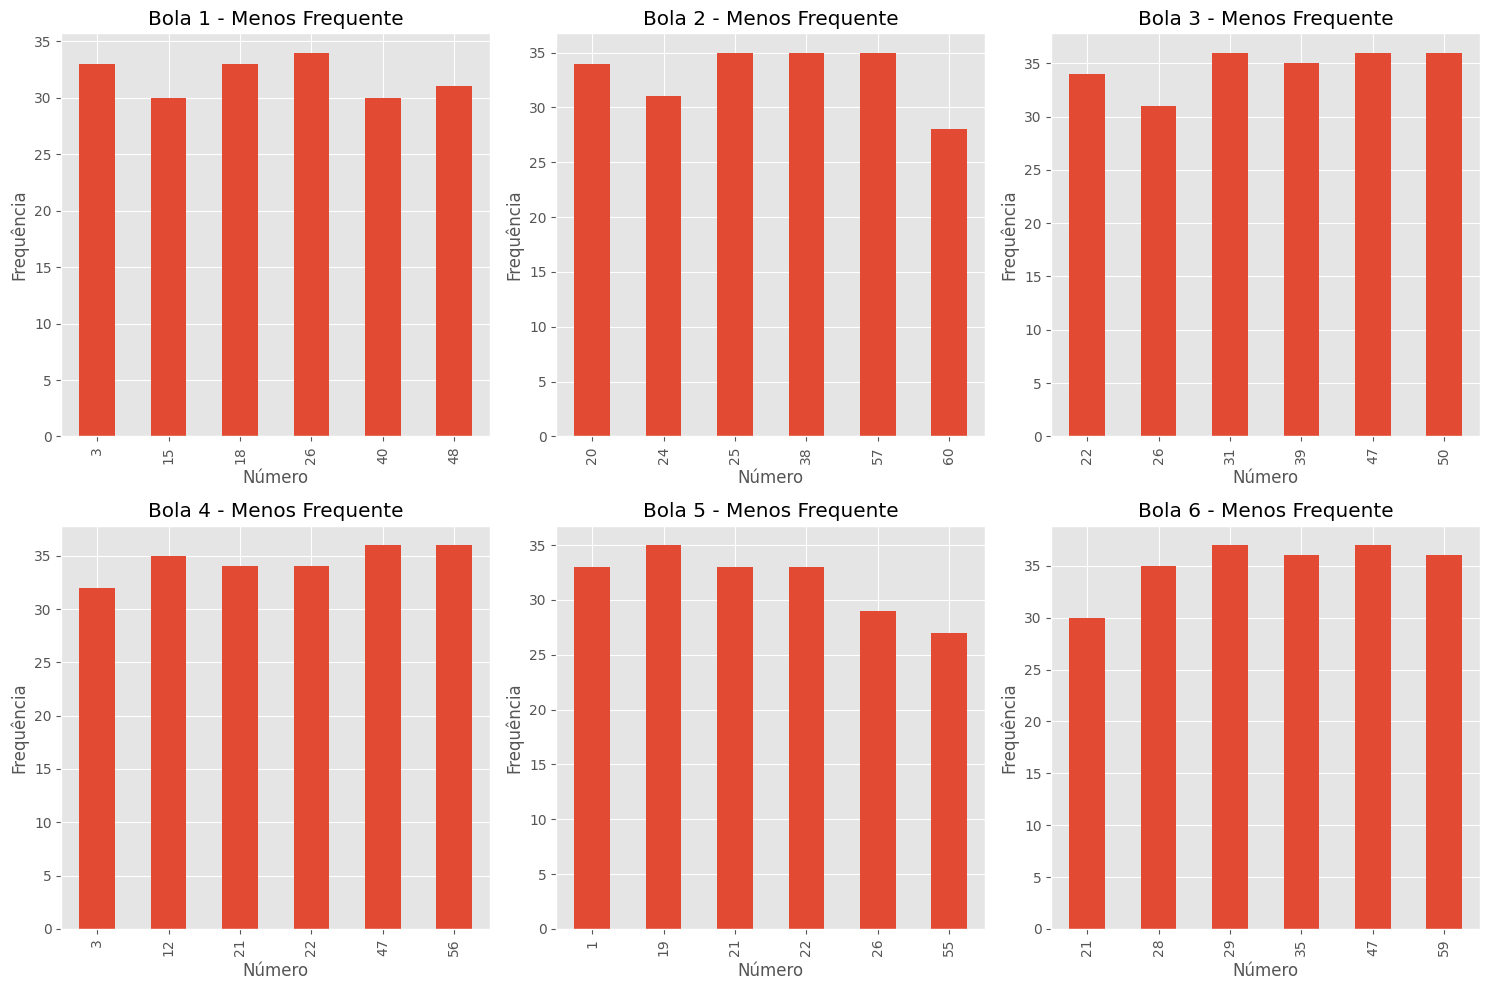

In [ ]:
# Definir o estilo do gráfico
plt.style.use('ggplot')

# Criar uma figura e um conjunto de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Títulos para os gráficos
titulos = ['Bola 1 - Menos Frequente', 'Bola 2 - Menos Frequente', 'Bola 3 - Menos Frequente',
           'Bola 4 - Menos Frequente', 'Bola 5 - Menos Frequente', 'Bola 6 - Menos Frequente']

# Calcular a frequência e plotar o gráfico para cada bola
for i in range(1, 7):
    bola = f'bola {i}'
    frequencia = df[bola].value_counts().tail(6)  # Pegar os 6 números menos frequentes
    ax = axes[(i-1)//3, (i-1)%3]  # Determinar a posição do subplot
    frequencia.sort_index().plot(kind='bar', ax=ax)
    ax.set_title(titulos[i-1])
    ax.set_xlabel('Número')
    ax.set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

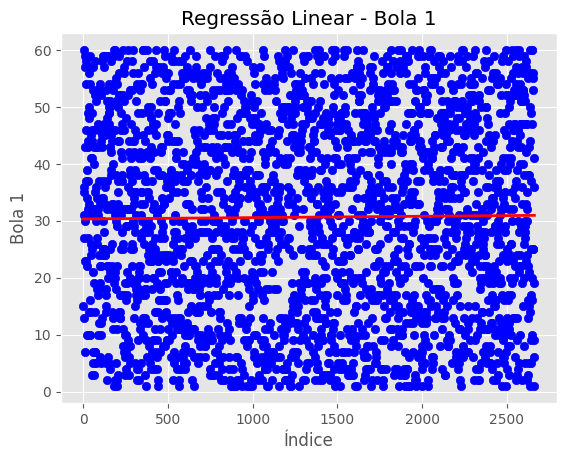

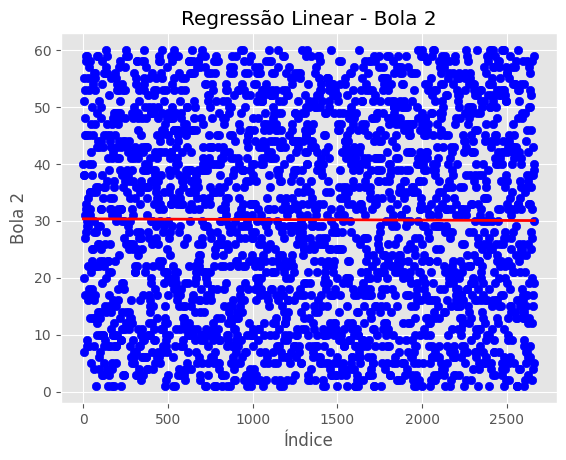

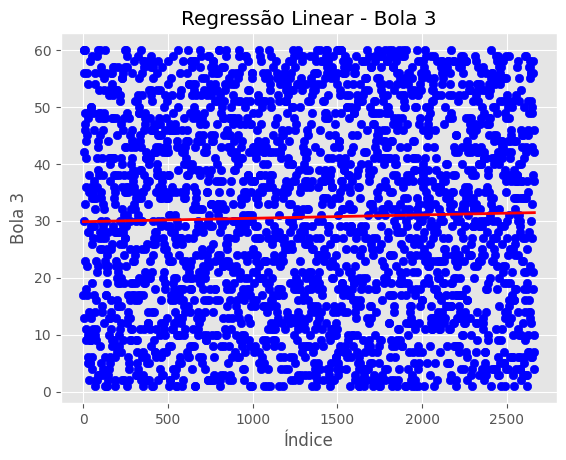

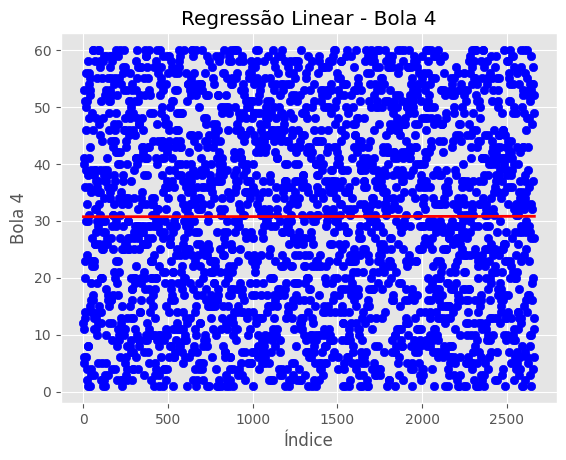

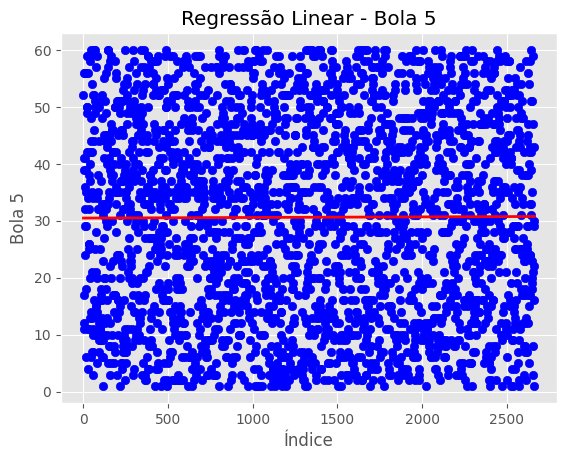

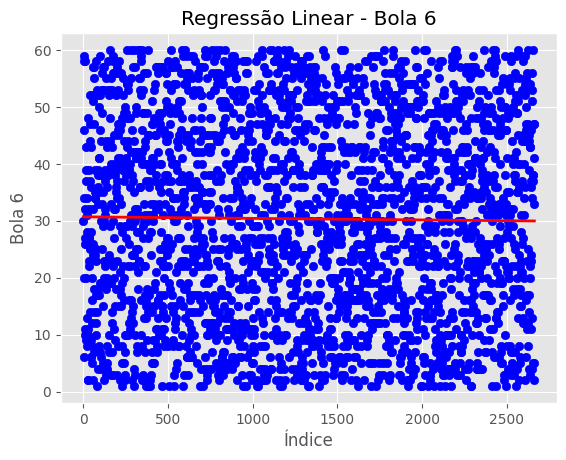

In [ ]:
###Regressão Linear para Todas as Bolas:

# Converte o índice do DataFrame para uma coluna numérica
df.reset_index(inplace=True)

# Preparando os dados para regressão
X = df.index.values.reshape(-1, 1)  # Índice do DataFrame como preditor

# Criar e treinar o modelo de regressão para cada bola
for i in range(1, 7):
    y = df[f'bola {i}'].values
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Visualizar a linha de regressão
    plt.scatter(X, y, color='blue')
    plt.plot(X, modelo.predict(X), color='red', linewidth=2)
    plt.title(f'Regressão Linear - Bola {i}')
    plt.xlabel('Índice')
    plt.ylabel(f'Bola {i}')
    plt.show()

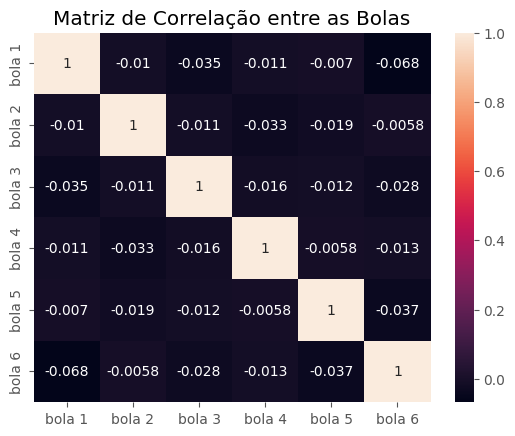

In [ ]:
###Correlação

# Calcular a matriz de correlação
correlacao = df[[f'bola {i}' for i in range(1, 7)]].corr()

# Visualizar a matriz de correlação
sns.heatmap(correlacao, annot=True)
plt.title('Matriz de Correlação entre as Bolas')
plt.show()

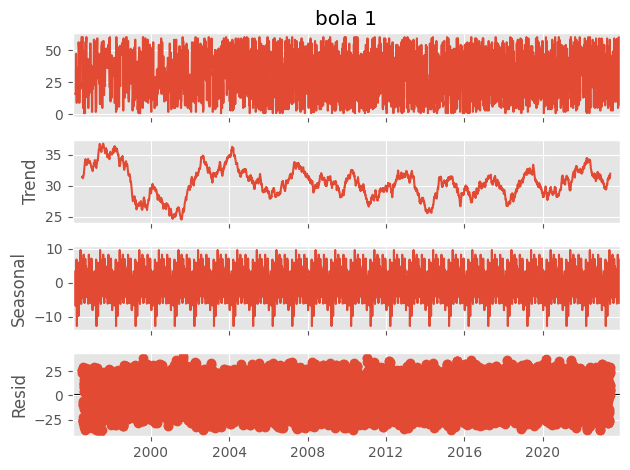

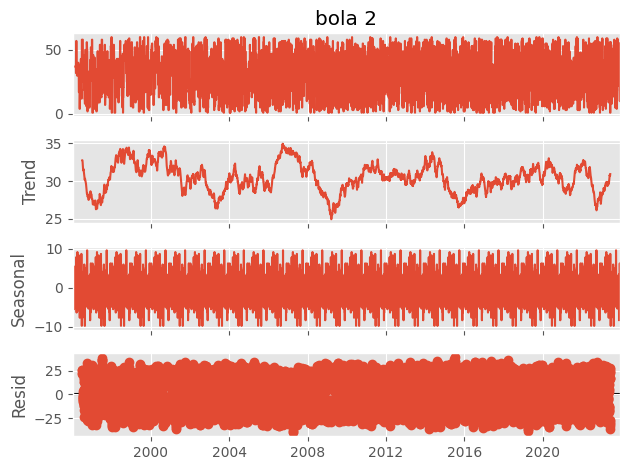

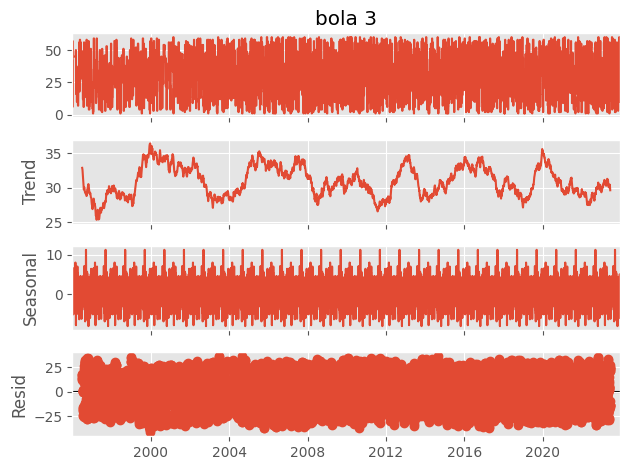

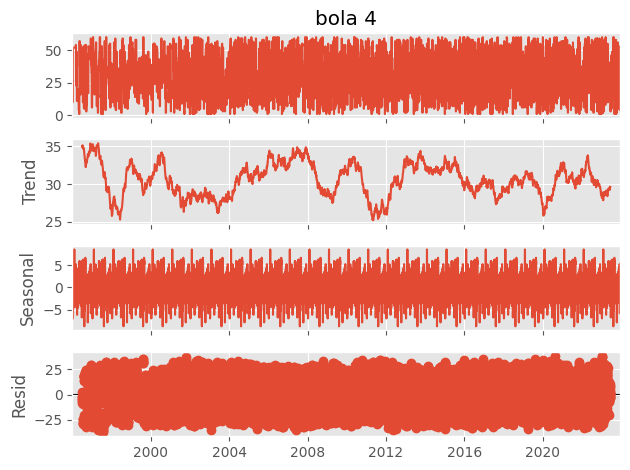

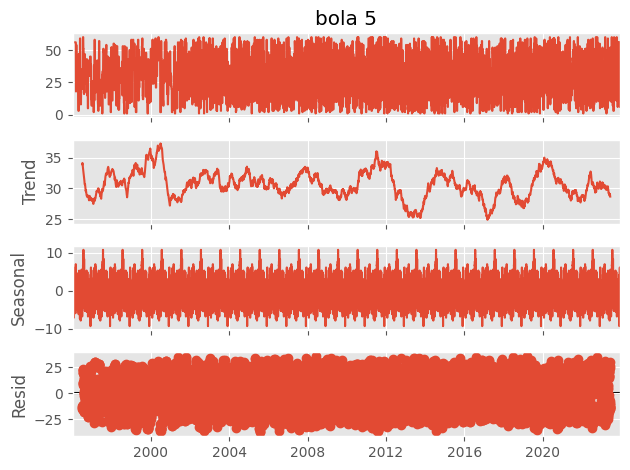

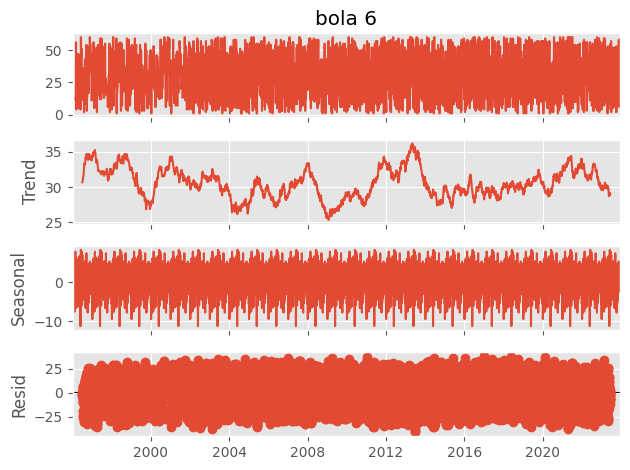

In [ ]:
###Análise temporal


# Definir a frequência dos dados, usando 'D' para diária
df = df.asfreq('D')

# Realizar a decomposição da série temporal para cada bola
for i in range(1, 7):
    # Verificar se a coluna contém valores nulos e tratá-los
    if df[f'bola {i}'].isnull().any():
        df[f'bola {i}'].fillna(method='ffill', inplace=True)

    resultado = seasonal_decompose(df[f'bola {i}'], model='additive', period=365)
    resultado.plot()
    plt.show()

In [ ]:
###Tentativa de Análise de Padrões

padroes = {}
for i in range(1, 7):
    # Contar a frequência de cada número para a bola atual
    padroes[f'bola {i}'] = Counter(df[f'bola {i}'])

# Exibir os padrões mais comuns para cada bola
for bola, frequencia in padroes.items():
    print(f'Padrões mais comuns para {bola}:')
    for numero, contagem in frequencia.most_common(5):
        print(f'Número {numero} apareceu {contagem} vezes')
    print()

Padrões mais comuns para bola 1:
Número 47.0 apareceu 218 vezes
Número 53.0 apareceu 218 vezes
Número 28.0 apareceu 217 vezes
Número 32.0 apareceu 215 vezes
Número 4.0 apareceu 214 vezes

Padrões mais comuns para bola 2:
Número 32.0 apareceu 245 vezes
Número 5.0 apareceu 226 vezes
Número 42.0 apareceu 225 vezes
Número 10.0 apareceu 224 vezes
Número 37.0 apareceu 216 vezes

Padrões mais comuns para bola 3:
Número 27.0 apareceu 237 vezes
Número 34.0 apareceu 235 vezes
Número 58.0 apareceu 232 vezes
Número 45.0 apareceu 222 vezes
Número 18.0 apareceu 222 vezes

Padrões mais comuns para bola 4:
Número 37.0 apareceu 248 vezes
Número 29.0 apareceu 228 vezes
Número 43.0 apareceu 219 vezes
Número 60.0 apareceu 209 vezes
Número 52.0 apareceu 208 vezes

Padrões mais comuns para bola 5:
Número 24.0 apareceu 238 vezes
Número 35.0 apareceu 236 vezes
Número 44.0 apareceu 234 vezes
Número 45.0 apareceu 223 vezes
Número 12.0 apareceu 223 vezes

Padrões mais comuns para bola 6:
Número 23.0 apareceu 225

In [ ]:
###Modelo de Previsão

# Preparar os dados para o modelo
X = df[[f'bola {i}' for i in range(1, 7)]]
y = df[[f'bola {i}' for i in range(1, 7)]]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de classificação multioutput
modelo = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar a acurácia do modelo para cada alvo
for i in range(6):
    acuracia = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'Acurácia do modelo para bola {i+1}: {acuracia:.2f}')

# Prever as próximas bolas com base nos últimos resultados
ultimos_resultados = df.iloc[-1:][[f'bola {i}' for i in range(1, 7)]]
proximas_bolas = modelo.predict(ultimos_resultados)
print(f'Próximas bolas que podem ser sorteadas: {proximas_bolas[0]}')

Acurácia do modelo para bola 1: 0.97
Acurácia do modelo para bola 2: 0.99
Acurácia do modelo para bola 3: 0.98
Acurácia do modelo para bola 4: 0.98
Acurácia do modelo para bola 5: 0.98
Acurácia do modelo para bola 6: 0.98
Próximas bolas que podem ser sorteadas: [50. 53. 14. 36. 27. 40.]


In [ ]:
##Hipóteses
# Criar uma tabela de contingência
tabela_contingencia = pd.crosstab(df['bola 1'], df['bola 2'])  # Ajuste para incluir todas as bolas necessárias

# Realizar o teste do Qui-Quadrado
chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)

# Avaliar o resultado
alpha = 0.05  # Nível de significância
if p_valor < alpha:
    print(f'Rejeitamos a hipótese nula (as bolas são independentes)')
else:
    print(f'Não rejeitamos a hipótese nula (as bolas são independentes)')

Rejeitamos a hipótese nula (as bolas são independentes)
